In [39]:
! pip install seaborn
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!python3 RunTest.py --numop 100000


📦 Compilando y ejecutando generador de test...
🧪 Ejecutando tests con dotnet...
=  Determining projects to restore...
  All projects are up-to-date for restore.
  ScapegoatTree -> /home/bardend/Documents/Cursos/8/AlgortimosAvanzado/Algorithms/Proyect2/ScapegoatTree/bin/Debug/net8.0/ScapegoatTree.dll
  ScapegoatTree.Tests -> /home/bardend/Documents/Cursos/8/AlgortimosAvanzado/Algorithms/Proyect2/ScapegoatTree.Tests/bin/Debug/net8.0/ScapegoatTree.Tests.dll
Test run for /home/bardend/Documents/Cursos/8/AlgortimosAvanzado/Algorithms/Proyect2/ScapegoatTree.Tests/bin/Debug/net8.0/ScapegoatTree.Tests.dll (.NETCoreApp,Version=v8.0)
=VSTest version 17.11.1 (x64)

Starting test execution, please wait...
A total of 1 test files matched the specified pattern.
📁 Ruta absoluta: /home/bardend/Documents/Cursos/8/AlgortimosAvanzado/Algorithms/Proyect2/input_csv/random_input
✅ Archivo generado: /home/bardend/Documents/Cursos/8/AlgortimosAvanzado/Algorithms/Proyect2/input_csv/random_input/ScapegoatTree

### Features:

1. **Scapegoat trees**, unlike most balanced-tree schemes, do not require keeping extra data (e.g., "colors" or "weights") in the tree nodes. Therefore, they do not have a `rotation` method.

2.  Once the scapegoat node `xᵢ` is found, we rebuild the subtree rooted at `xᵢ`. To **rebuild a subtree** is to replace it with an **1/2-weight-balanced** subtree containing the same nodes. This can be done easily in time **O(size(xⱼ))**. Section 6 describes how this can be done in space **O(log n)** as well.

### Invariants

1. The height of the tree always satisfies:

$$
h \leq \log_{1/\alpha}(n)
$$

3. A node \( x_i \) is considered a scapegoat if it satisfies the condition:

$$
\text{size}(\text{left}(x_i)) \leq \alpha \times \text{size}(x_i) \quad \text{and} \quad \text{size}(\text{right}(x_i)) \leq \alpha \times \text{size}(x_i)
$$



In [3]:
def get_xy(df, x_column, y_column):
    """
    Extrae las columnas x, y del DataFrame
    
    Parámetros:
    - df: DataFrame
    - x_column: nombre de la columna para X
    - y_column: nombre de la columna para Y
    
    Retorna:
    - x, y: arrays con los valores
    """
    x = df[x_column].values
    y = df[y_column].values
    
    return x, y


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Lista global para almacenar las series
series_data = []

def add_series(x, y, label=None):
    """Añade una serie x,y para plotear después"""
    series_data.append({'x': x, 'y': y, 'label': label})
def plot_all(title="Gráfico", xlabel="X", ylabel="Y", log_scale=False, subsample=None):
    """
    Plotea todas las series añadidas con opciones para manejar datos grandes
    
    Parámetros:
    - log_scale: bool, si usar escala logarítmica en Y
    - subsample: int, número de puntos a mostrar (submuestreo)
    """
    plt.figure(figsize=(12, 8))
    
    for i, serie in enumerate(series_data):
        x_data = np.array(serie['x'])
        y_data = np.array(serie['y'])
        
        # Submuestreo si se especifica
        if subsample and len(x_data) > subsample:
            indices = np.linspace(0, len(x_data)-1, subsample, dtype=int)
            x_data = x_data[indices]
            y_data = y_data[indices]
        
        label = serie['label'] if serie['label'] else f"Serie {i+1}"
        
        # Para muchos puntos, no usar markers
        if len(x_data) > 1000:
            plt.plot(x_data, y_data, label=label, linewidth=1)
        else:
            plt.plot(x_data, y_data, label=label, marker='o', markersize=1)
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Escala logarítmica si se solicita
    if log_scale:
        plt.yscale('log')
        plt.ylabel(f"{ylabel} (escala log)", fontsize=12)
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def clear_series():
    """Limpia todas las series almacenadas"""
    global series_data
    series_data = []

# Ejemplo de uso:


In [5]:
import pandas as pd
import os

# Ruta a la carpeta donde están los CSV
def show_data(folder = "input_csv/random_input"):
    
    # Lista para acumular todos los DataFrames
    dfs = []

    # Recorrer cada archivo .csv
    for file in sorted(os.listdir(folder)):
        if file.endswith(".csv"):
            file_path = os.path.join(folder, file)

            # Extraer el alpha del nombre del archivo
            # ejemplo: "ScapegoatTree_alpha_0_60.csv" → "0.60"
            alpha_str = file.split("_")[-1].replace(".csv", "").replace("_", ".")
            alpha = float(alpha_str)

            # Leer el CSV
            df = pd.read_csv(file_path)
            y_columns = [col for col in df.columns if col != "Index"]
            
            for col in y_columns :
                x, y = get_xy(df, "Index", col)
                add_series(x, y, col)
                
        # Plotear todo
        plot_all(f"ScapegoatTree_{alpha}", "N. Operaciones", "Tiempo")
        
        # Limpiar para el siguiente gráfico
        clear_series()

### RANDOM TEST

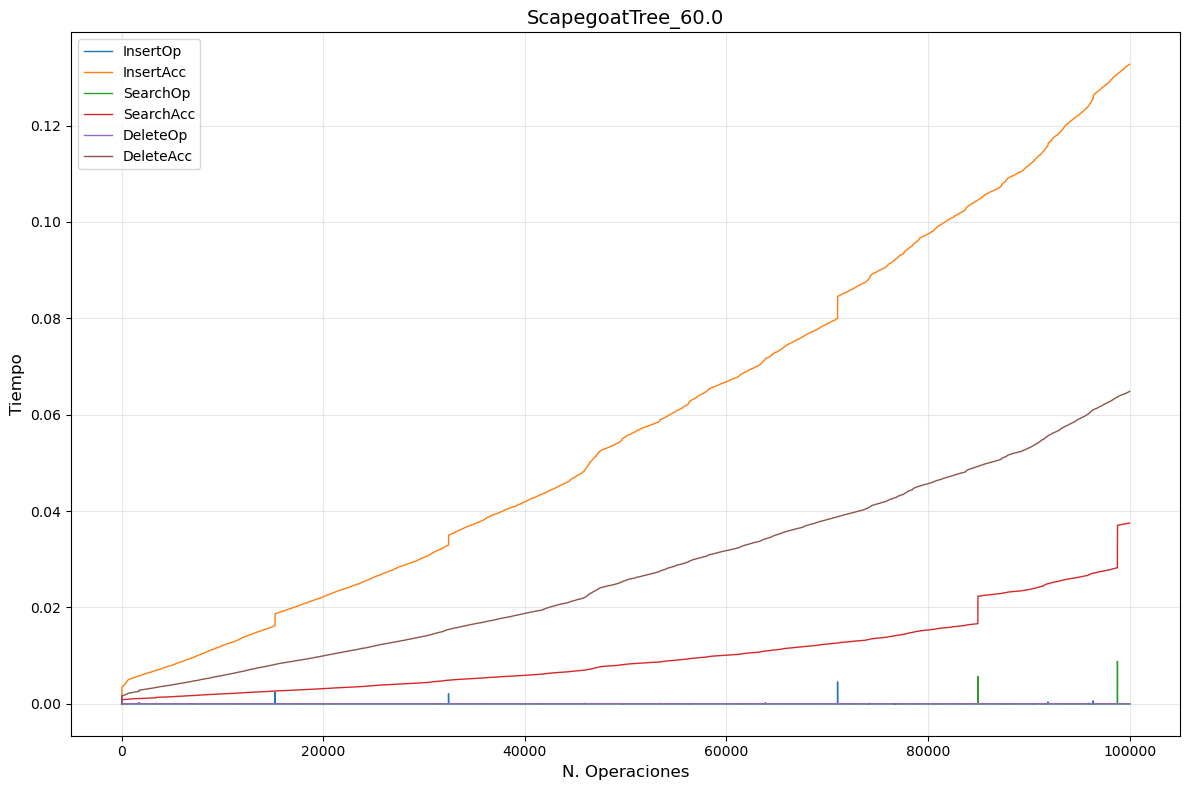

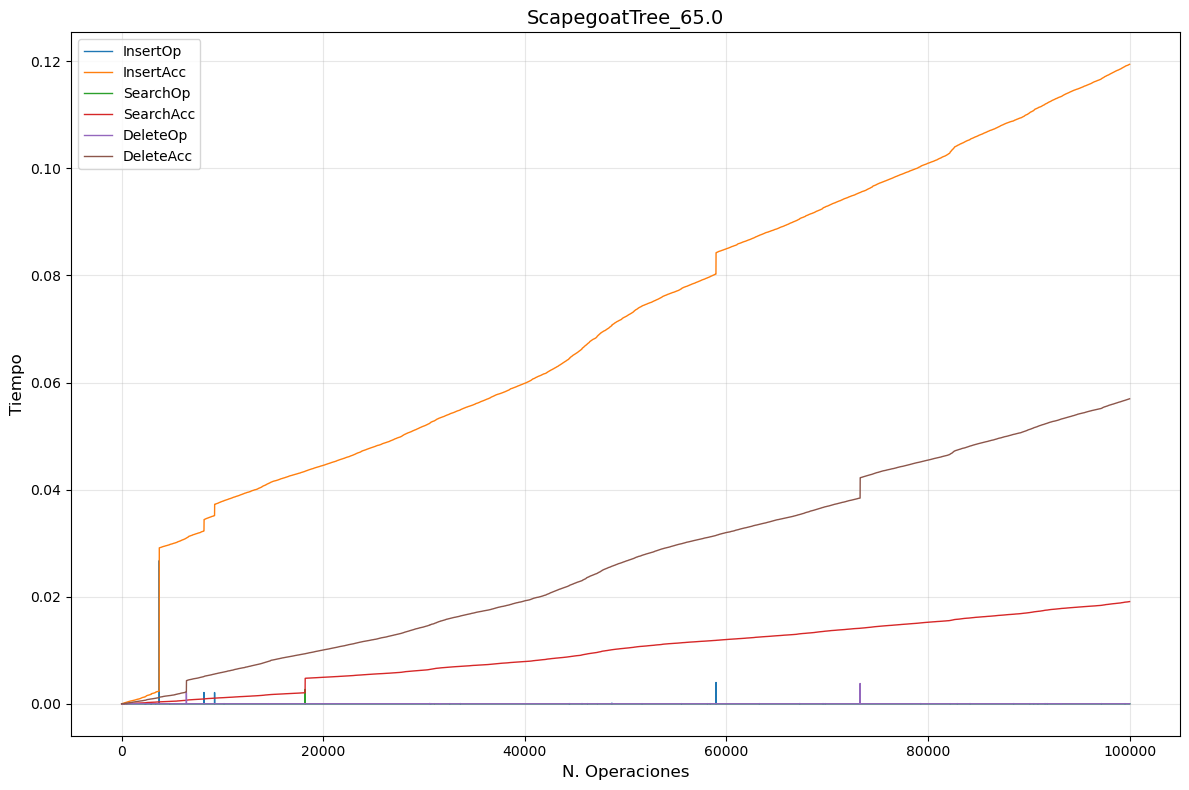

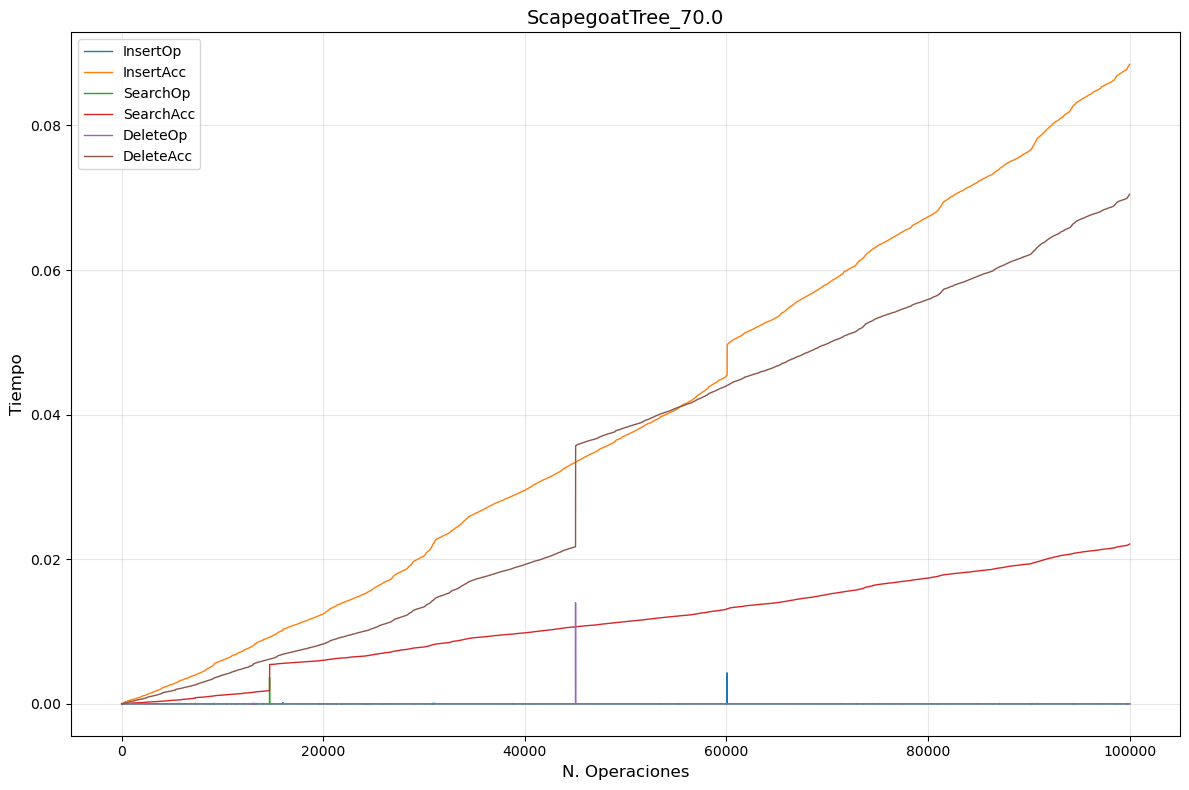

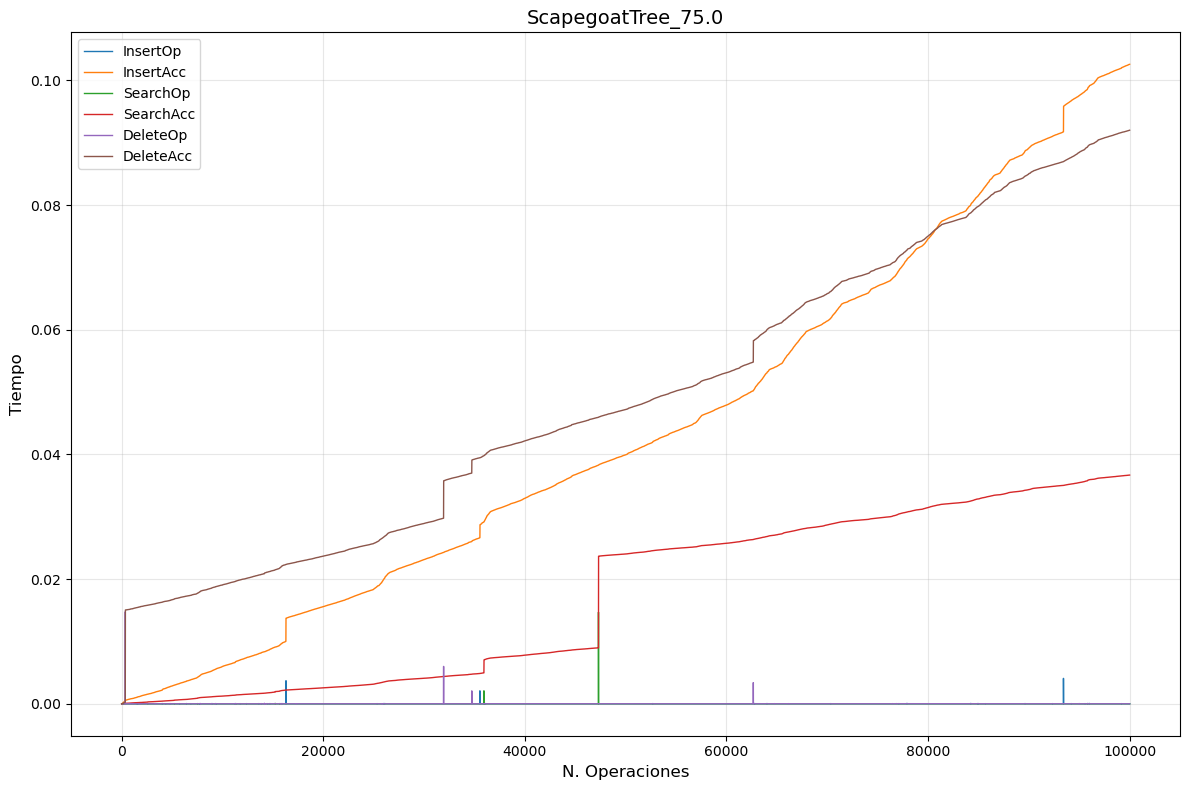

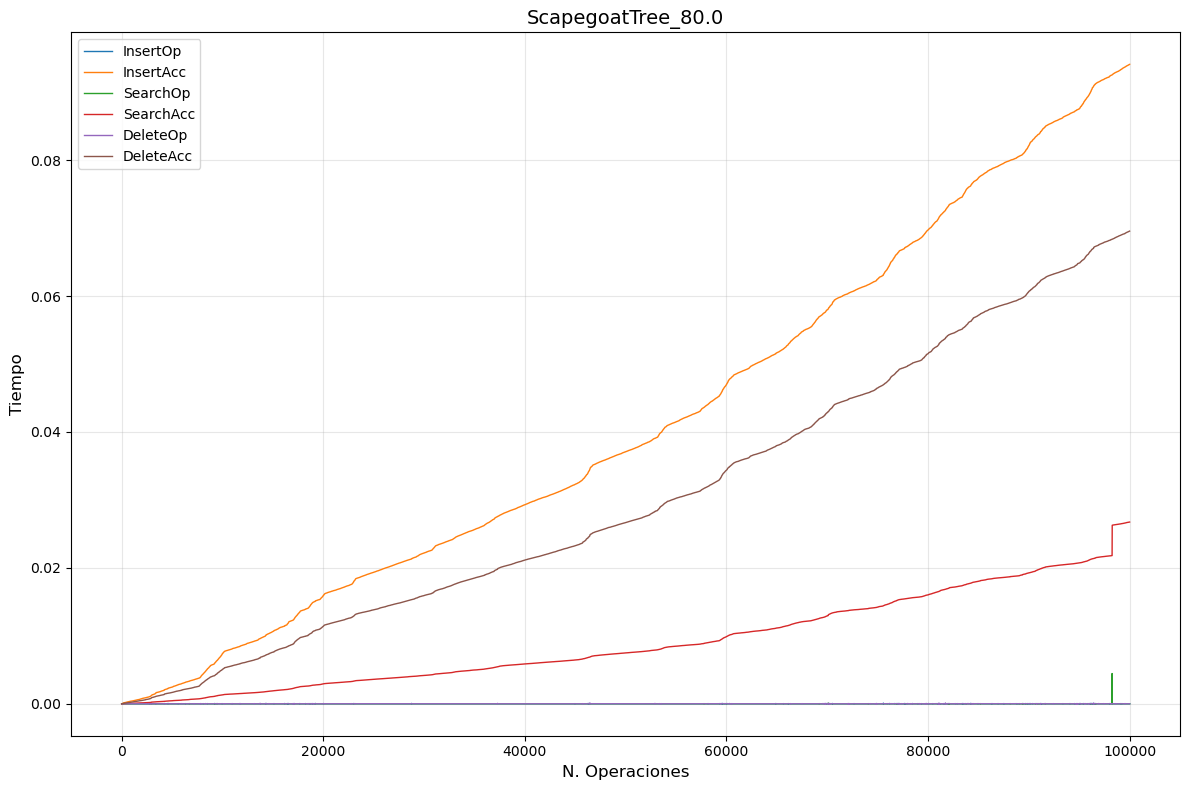

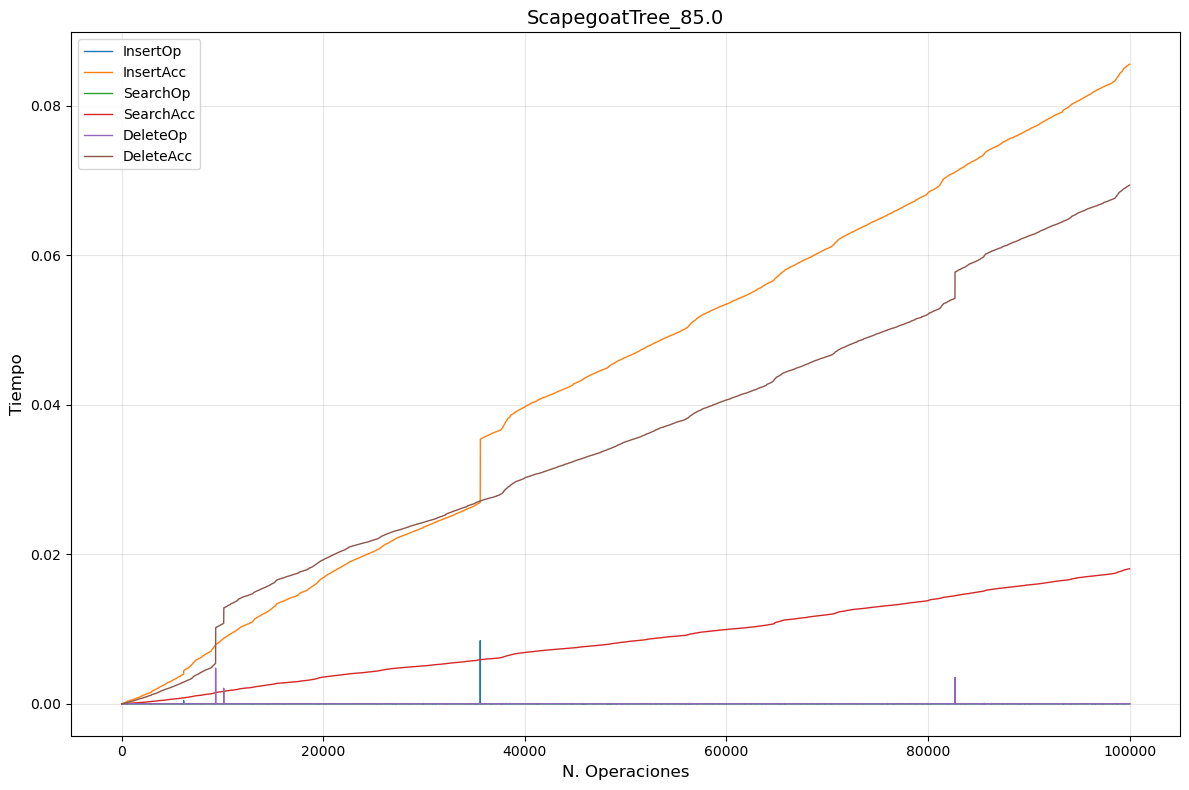

In [6]:
show_data("input_csv/random_input")

## WORST TEST

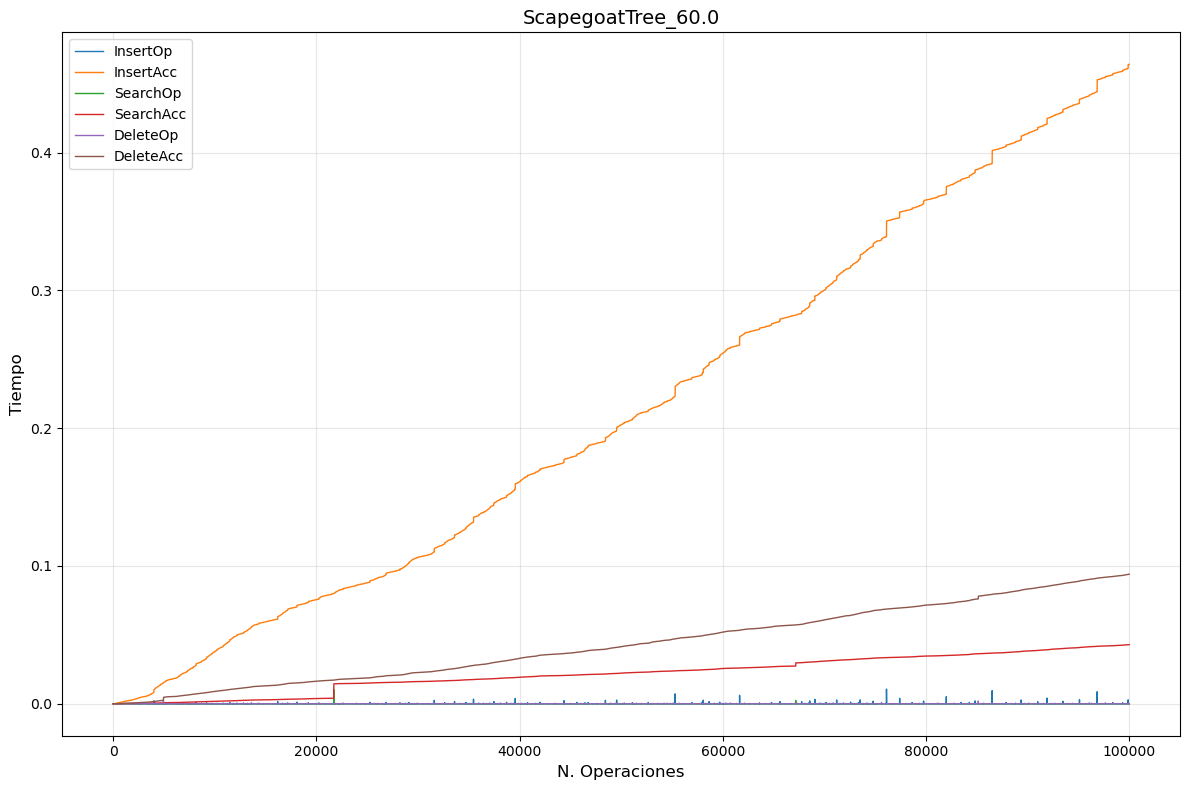

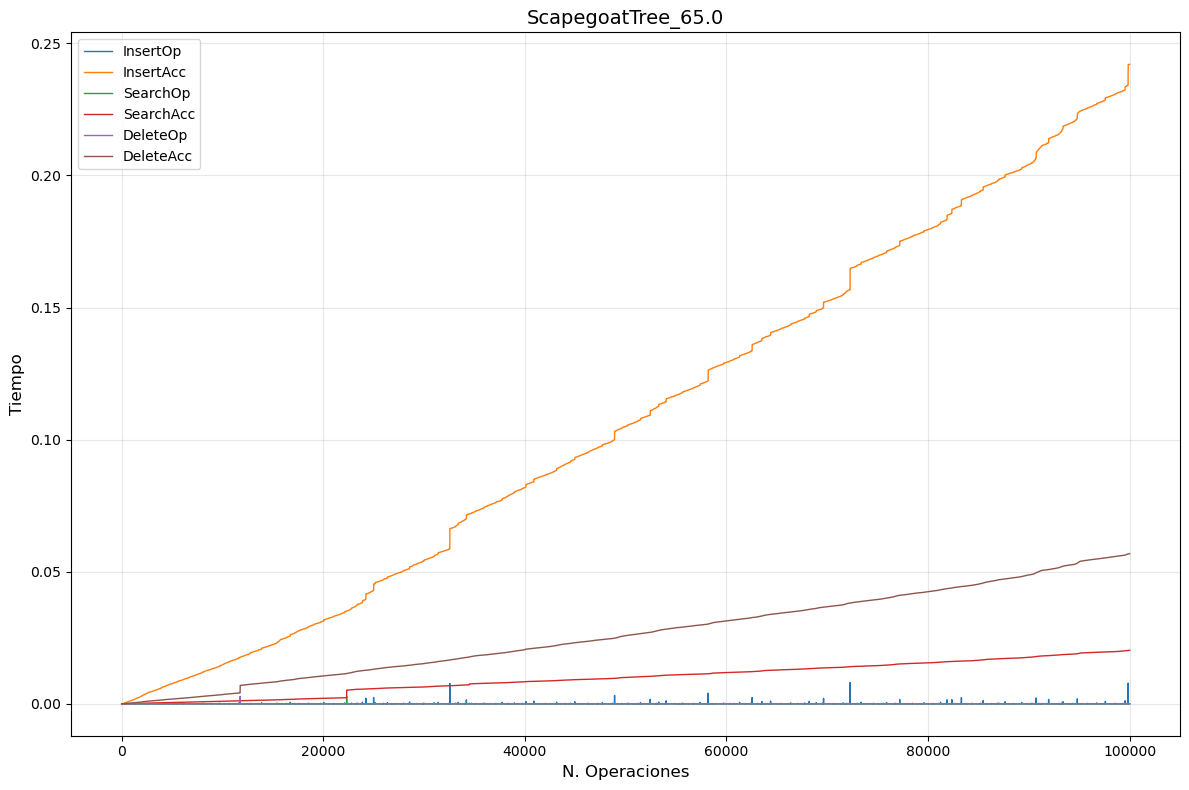

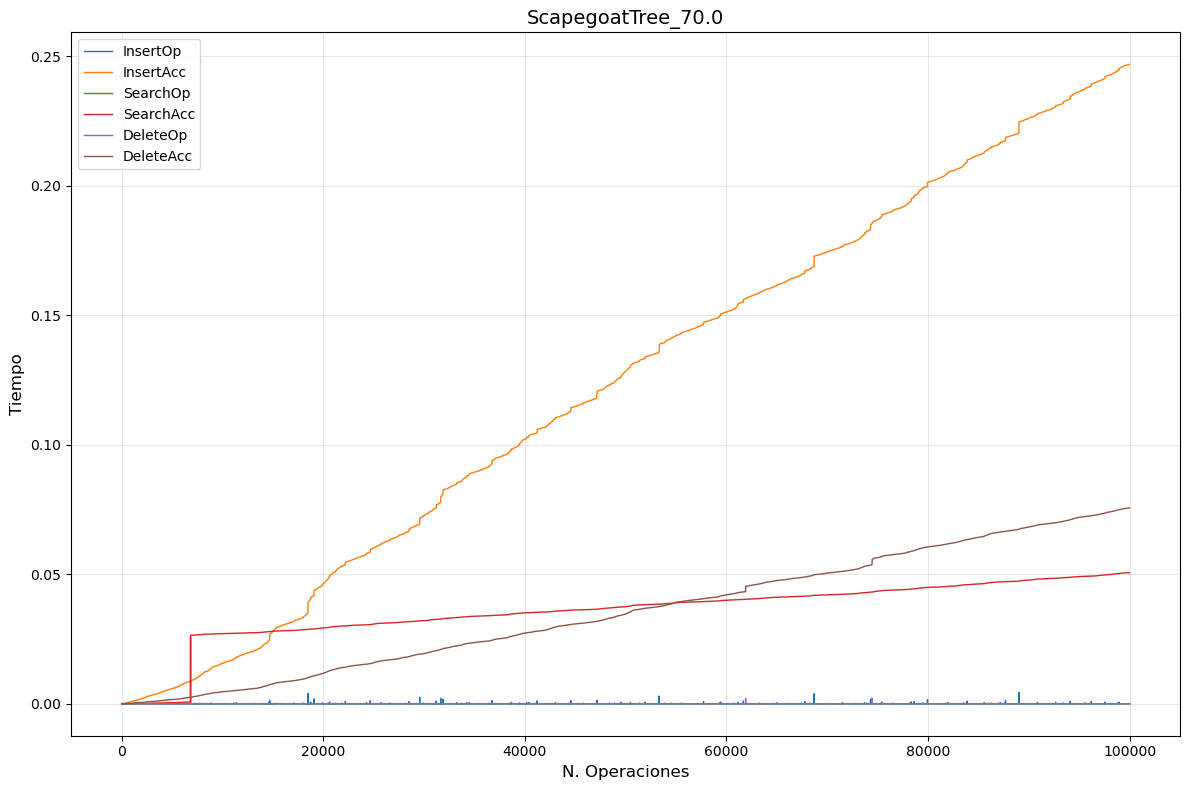

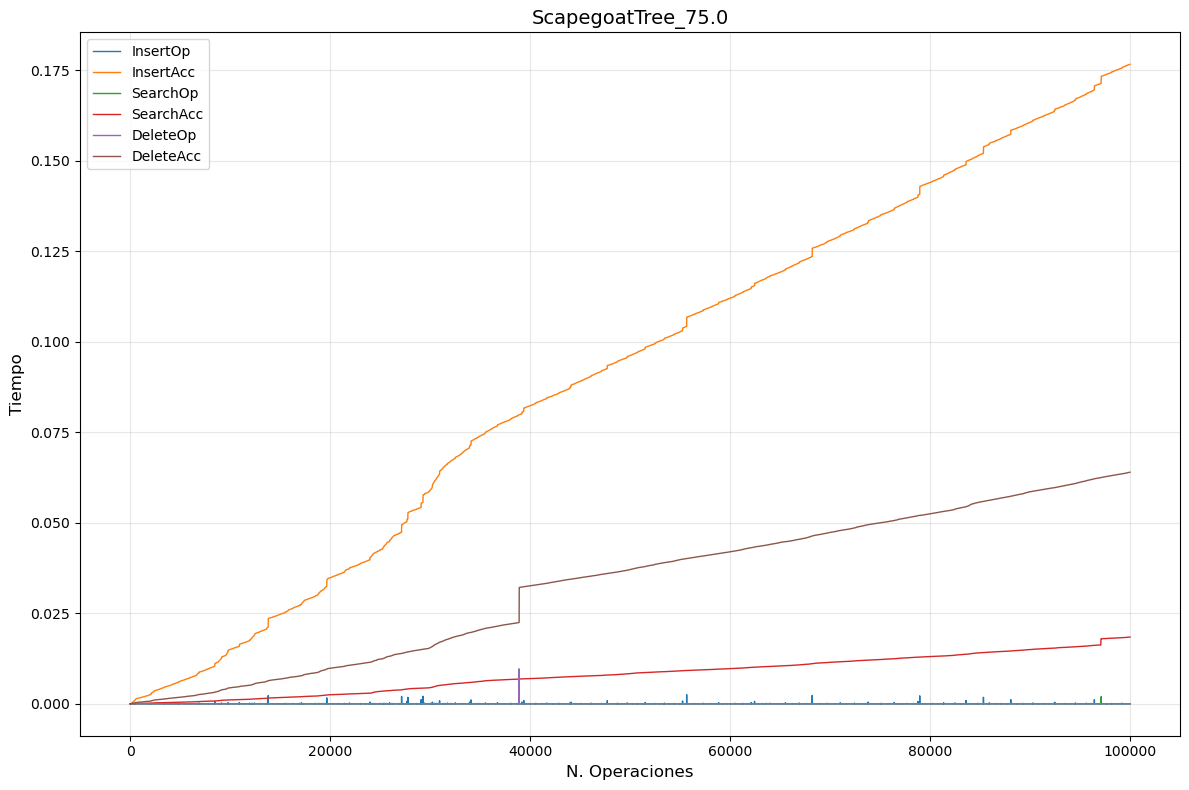

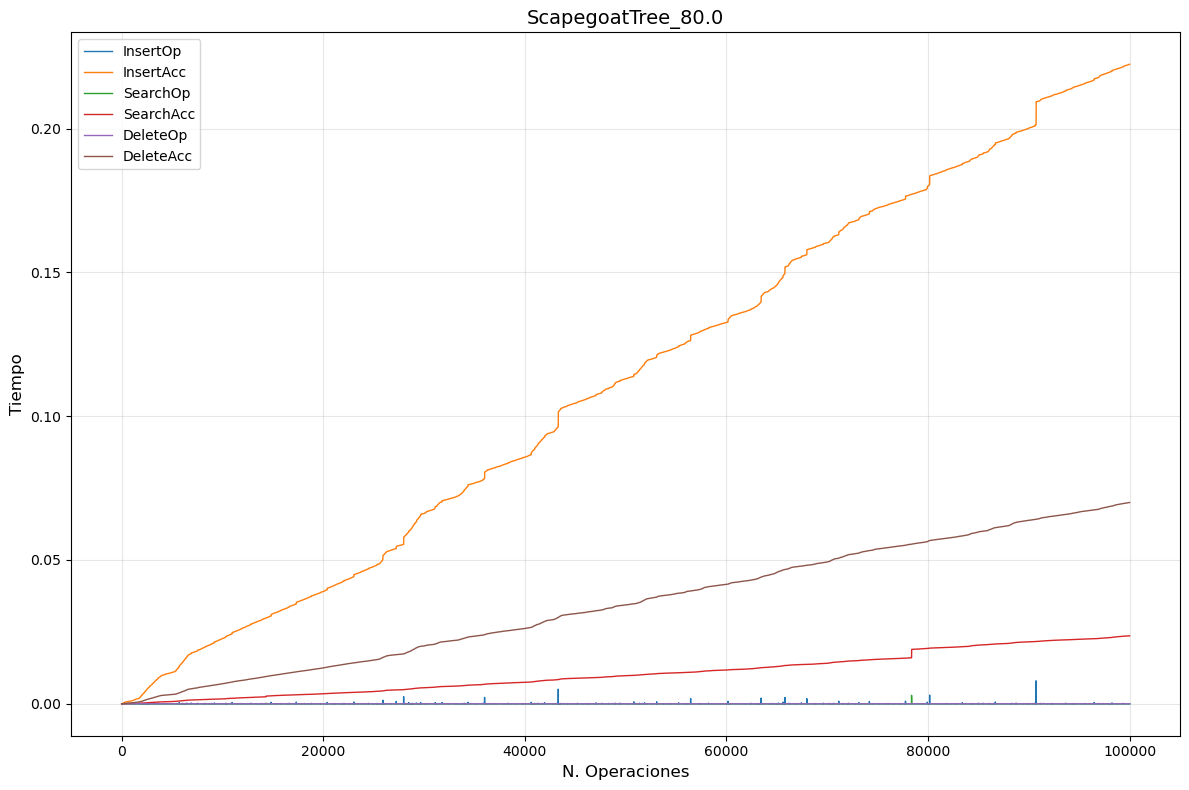

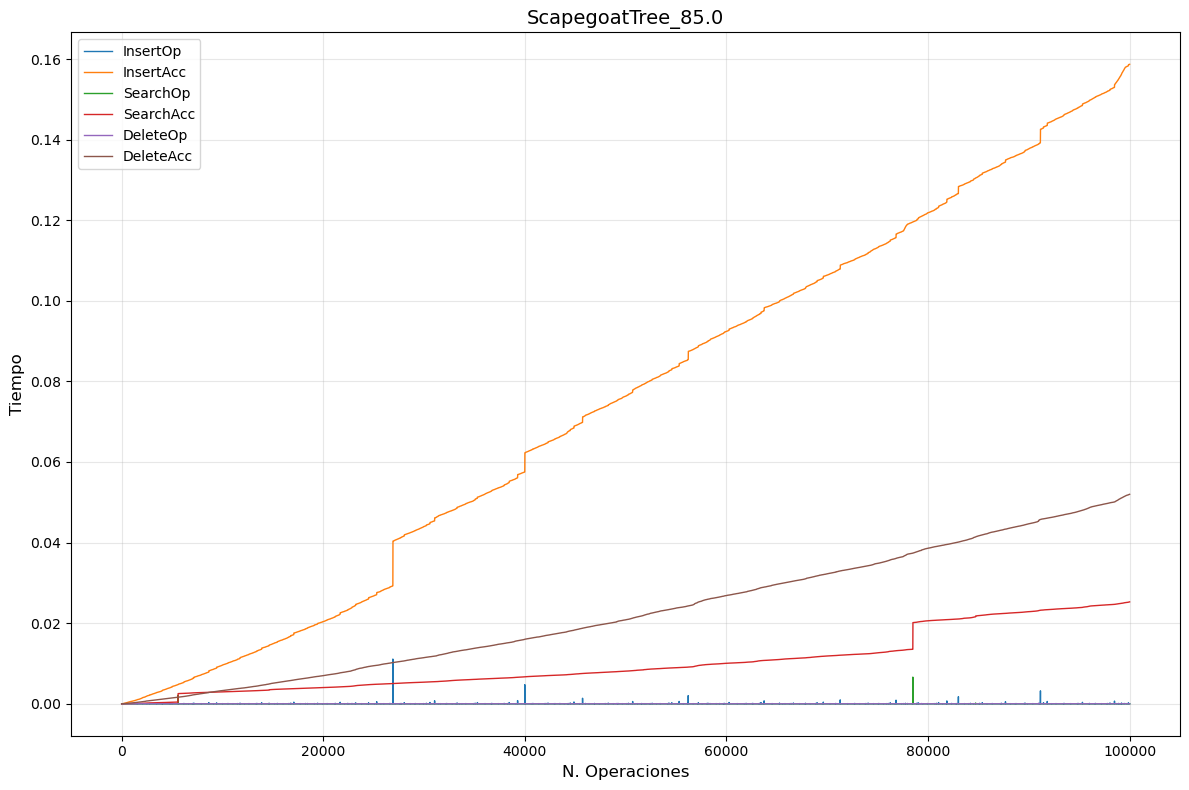

In [7]:
show_data("input_csv/worst_input")

1. However, ``splay trees`` do not guarantee a logarithmic worst-case bound on the cost of a SEARCH, and require restructuring even during searches.
2. A scapegoat tree can handle a sequence of \( n \) **INSERT** and \( m \) **SEARCH** or **DELETE** operations, beginning with an empty tree, with

- \( O(\log n) \) amortized cost per **INSERT** or **DELETE**, and
- \( O(\log k) \) worst-case time per **SEARCH**,

where \( k \) is the size of the tree the **SEARCH** is performed on.
